# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
matplotlib inline

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combine_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [31]:
# Checking the number of mice.
mouse_count = combine_data_df["Mouse ID"].nunique()
mouse_count

249

In [32]:
combine_data_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data_df[combine_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep = False)]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_data_df.loc[combine_data_df["Mouse ID"]== "g989",:]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combine_data_df[combine_data_df['Mouse ID'].isin(duplicate_mice) ==False]
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [37]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique()
)

248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Assemble the resulting series into a single summary DataFrame.

grouped_data = clean_data_df.groupby('Drug Regimen')

mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var()
standard_deviation = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()


summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': standard_deviation,
    'Tumor Volume Std. Err.': sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var','std','sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [41]:
# Calculate mice per Drug Regime
mice_per_treatment = clean_data_df["Drug Regimen"].value_counts()
mice_per_treatment

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

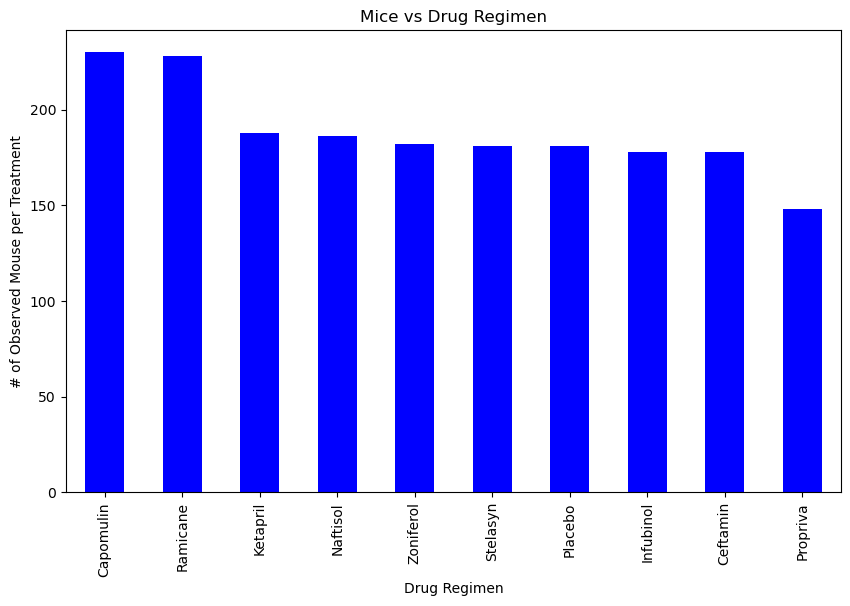

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_per_treatment.plot(kind='bar', color='blue', figsize=(10, 6))

plt.title ("Mice vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse per Treatment")

plt.show()

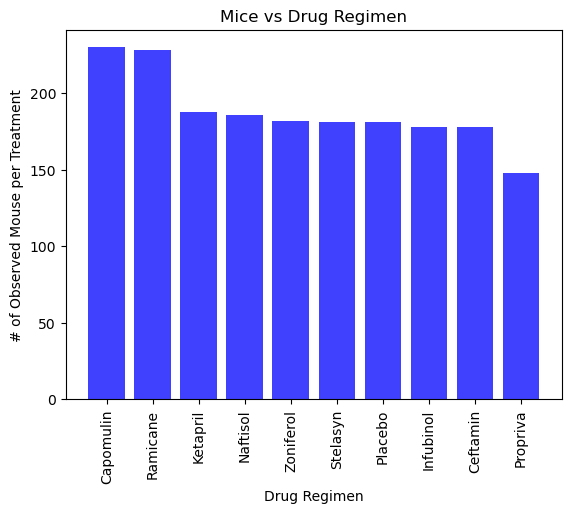

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_per_treatment.index.values
y_axis = mice_per_treatment.values


plt.bar(x_axis, y_axis, color = 'b', alpha=0.75, align="center")

plt.title ("Mice vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse per Treatment")
plt.xticks(rotation="vertical")

plt.show()

In [44]:
gender_data = clean_data_df["Sex"].value_counts()

gender_data

Male      958
Female    922
Name: Sex, dtype: int64

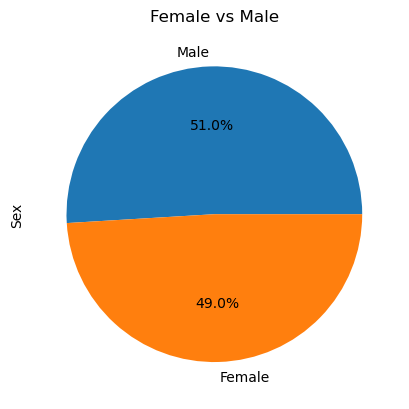

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data_df["Sex"].value_counts()
gender_data.plot.pie(autopct="%1.1f%%")
plt.title ("Female vs Male")
plt.show()

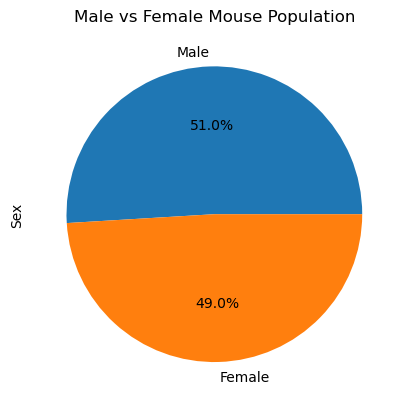

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_data.values, labels=gender_data.index.values, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()
greatest_tumor
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_merged = greatest_tumor.merge(clean_data_df, how="left", on=["Mouse ID", "Timepoint"])
clean_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [49]:
# Put treatments into a list for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol = clean_merged.loc[clean_merged["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    volume_list.append(vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = vol.quantile([0.25,0.50,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Print out the results
    print(f"{treatment}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


Capomulin
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


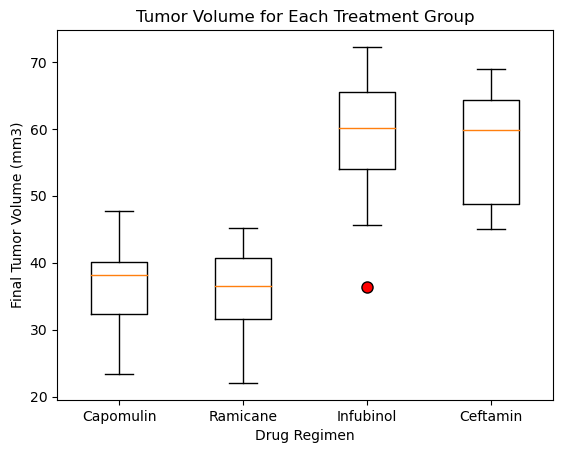

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
boxplot_dict = ax1.boxplot(volume_list, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.setp(boxplot_dict['fliers'], markerfacecolor='red', marker='o', markersize=8)
plt.show()


## Line and Scatter Plots

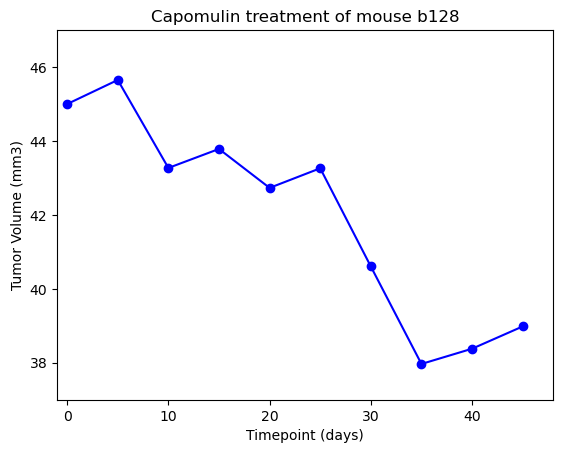

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume = clean_data_df.loc[(clean_data_df["Mouse ID"] == "b128"),["Tumor Volume (mm3)"]]
timepoint = clean_data_df.loc[(clean_data_df["Mouse ID"] == "b128"),["Timepoint"]]

plt.plot(timepoint, tumor_volume, marker='o', color='b', linestyle='-')
plt.title('Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(-1, 48)
plt.ylim(37, 47)
plt.show()


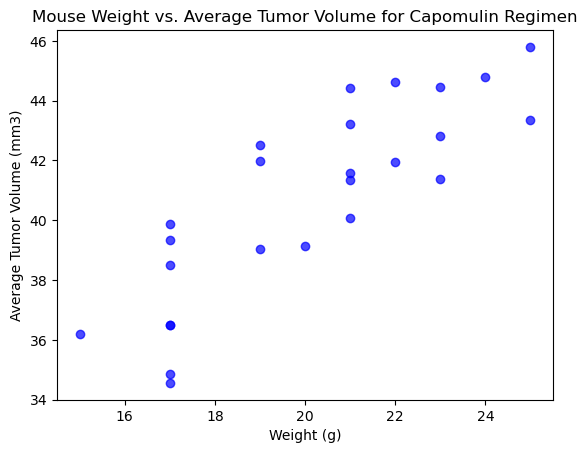

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data_df[clean_data_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().values
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean().values

plt.scatter(mouse_weights, average_tumor_volume, color='blue', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


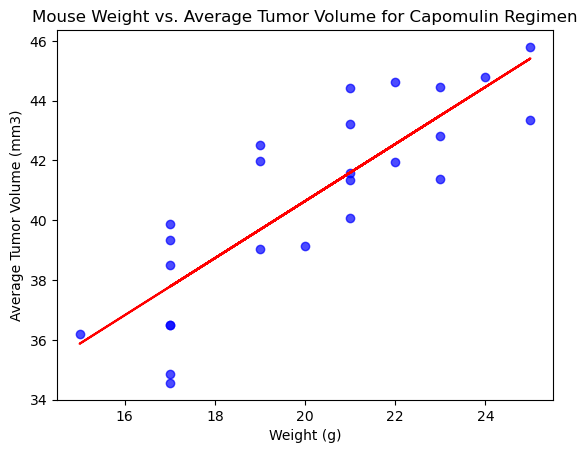

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data_df[clean_data_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().values
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean().values

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, average_tumor_volume)

correlation = st.pearsonr(mouse_weights,average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Generate scatter plot
plt.scatter(mouse_weights, average_tumor_volume, color='blue', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot the regression line
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red')

plt.show()